In [1]:
import math
import os
import pylab
import csv
import pymorphy2

In [2]:
def csv_dict_writer(path, fieldnames, data):
    """
    Writes a CSV file using DictWriter
    """
    with open(path, "w", newline='') as out_file:
        writer = csv.DictWriter(out_file, delimiter=';', fieldnames=fieldnames)
        writer.writeheader()
        for row in data:
            writer.writerow(row)

In [3]:
def fix_text(strings_list):
    black_list = [',', '.', '!','?','-',';','\'','(',')','[',']','{','}', '–']
    functors_pos = {'INTJ', 'PRCL', 'CONJ', 'PREP', 'NUMB'}
    morph = pymorphy2.MorphAnalyzer()
    # цикл для удаления подстрок из black_list 
    for i in range(len(strings_list)):
        for j in range(len(black_list)):
            strings_list[i] = strings_list[i].replace(black_list[j],'')
        temp = strings_list[i].lower().split();
        strings_list[i] = ""
        # цикл для замены слова на его начальную форму 
        for j in range(len(temp)):
            p = morph.parse(temp[j])
            if len(p)>0 and p[0].tag.POS not in functors_pos:
                strings_list[i] += p[0].normal_form
            else:
                strings_list[i] += temp[j]
            strings_list[i] += " "
        strings_list[i].strip()
    return strings_list

In [4]:
dirs = os.listdir("dictionary")
print("Список коллекций для анализа")
print("=======================================")
for i in range(len(dirs)):
    print(str(i)+"=>"+dirs[i])
print("=======================================")
print("\r\nВведите коллекции документа для анализа")
ind = int(input())

Список коллекций для анализа
0=>all_files
1=>Data Science
2=>История
3=>Начало работы с WPF. Visual Studio

Введите коллекции документа для анализа
0


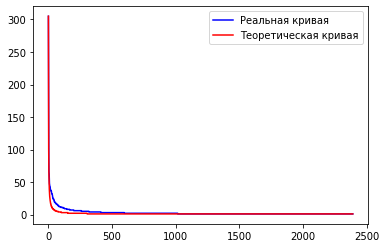

In [5]:

files = os.listdir("dictionary/"+dirs[ind])
global_word_dict_arr = {}
for j in range(len(files)):
    with open('dictionary/'+dirs[ind]+"/"+files[j]) as f:
        arr = f.readlines()
    arr = fix_text(arr)
    n = len(arr)
    letter = [arr[i].lower().split() for i in range(n)]
    word_set = {}
    for i in range(n):
        word_set = set(word_set).union(set(letter[i]))
    word_dict_arr = dict.fromkeys(word_set, 0)
    for i in range(n):
        for word in letter[i]:
            word_dict_arr[word] += 1
    for key, val in word_dict_arr.items():
        if global_word_dict_arr.__contains__(key):
            global_word_dict_arr[key] += val
        else:
            global_word_dict_arr[key] = val
global_word_dict_arr = {k: v for k, v in sorted(global_word_dict_arr.items(), reverse=True,key=lambda item: item[1])}

# Область значений для текущих данных
global_word_list_arr = [v for k, v in sorted(global_word_dict_arr.items(), reverse=True,key=lambda item: item[1])]

# Строим область определения
x = [i+1 for i in range(len(global_word_list_arr))]

# Строим Ципфа
C = global_word_list_arr[0] # постоянная величина
y = [math.ceil(float(C)/(i+1)) for i in range(len(global_word_list_arr))]

# Строим графики
pylab.plot(x, global_word_list_arr, '-b', label='Реальная кривая')
pylab.plot(x, y, '-r', label='Теоретическая кривая')
pylab.legend()
pylab.show()

my_list = [{"Слово":k,"Текущие данные":v} for k, v in sorted(global_word_dict_arr.items(), reverse=True,key=lambda item: item[1])]
for i in range(len(my_list)):
    my_list[i]["Ципф"] = y[i]

csv_dict_writer("zipf_table.csv", ["Слово","Текущие данные", "Ципф"], my_list)